In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data :

### MNIST

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### JAFFE

In [3]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [4]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

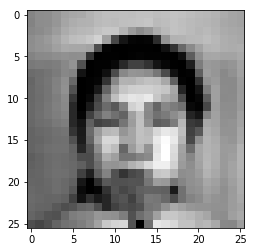

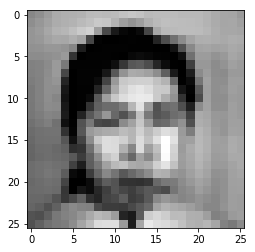

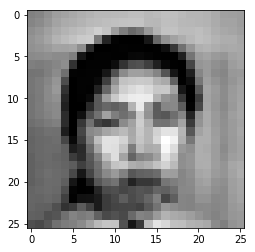

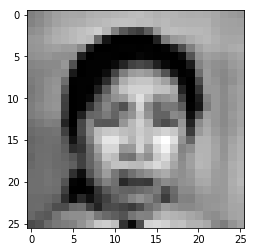

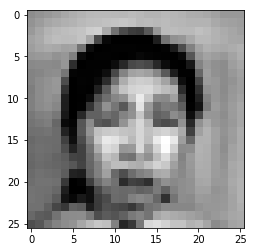

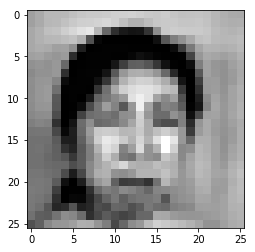

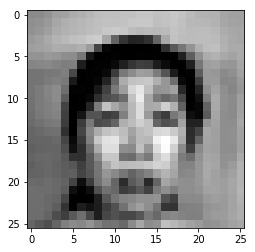

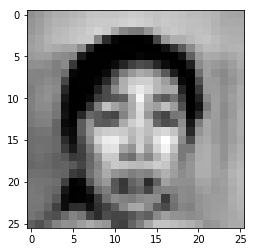

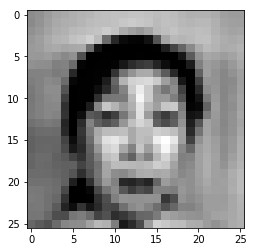

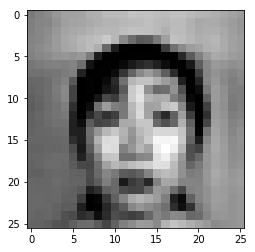

In [5]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [6]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


# Neural network with Random initialisation

In [9]:
# CREATION DU RESEAU DE NEURONE
#sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 676])

initializer =  tf.contrib.layers.xavier_initializer()

W1 = tf.Variable(tf.zeros([676,256]))
b1 = tf.Variable(tf.zeros([256]))

y1 = tf.nn.relu(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(tf.zeros([256,128]))
b2 = tf.Variable(tf.zeros([128]))

y2 = tf.nn.softmax(tf.matmul(y1,W2) + b2)

W3 = tf.Variable(tf.zeros([128,10]))
b3 = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(y2,W3) + b3)

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y)
                         + (1 - y_) * tf.log(1 - y), axis=1))

sess.run(tf.global_variables_initializer())
#If using TensorFlow prior to 0.12 use:

LEARNING_RATE = 0.01

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

test1
test2
test3
epoch :  0 / 100
accuracy :  0.074074075
loss :  3.2508307

test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
epoch :  10 / 100
accuracy :  0.074074075
loss :  3.25066

test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
epoch :  20 / 100
accuracy :  0.074074075
loss :  3.2504938

test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
epoch :  30 / 100
accuracy :  0.074074075
loss :  3.250331

test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
test1
test2
test3
epoch :  40 / 100
accu

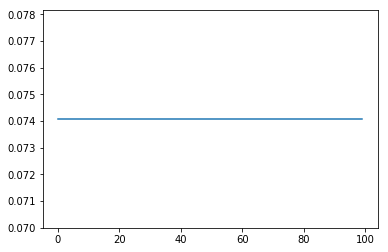

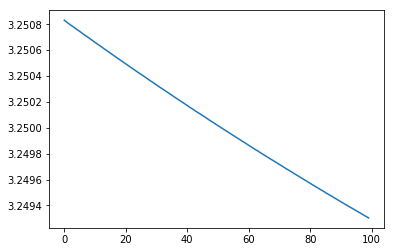

In [10]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 100

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch)
        print("accuracy : " , ac)
        print("loss : ",l )
        print()
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()